*This Practical was presented at the **EU-FTICR-MS Advance User School 2019** held in Lisbon 15-18 April 2019*

In this Practical, we are going to explore the processing of a FT-ICR-MS data-set, using the SPIKE program.

# SPIKE
## presentation
### SPIKE a collaborative development for a FT-spectroscopy processing program.
- FT spectrometries: NMR FTICR-MS Orbitrap-MS
- a collaborative effort
    - open source on [bitbucket](http://bitbucket.org/delsuc/spike)
    - [CASC4DE](http://www.casc4de.eu) is part of the effort
- many high end features required for FTICR - in particular 2D-FTICR
    - denoising
    - hierarchical data-sets, internally compressed
    - fast processing, using multiprocessor set-up (either desktop or mainframe)
    - GPU enhanced computation

### more a "library" than a interactive program
- natural interface is python, natural GUI is jupyter
- mostly developer documentation, still few examples but we're working on it

### several notebooks available
several notebooks are distributed alongside SPIKE:
https://bitbucket.org/delsuc/spike/src (*check the Notebooks directory*), 

in particular

- `Proc1DNMR.ipynb` : process and display 1D NMR datasets
- `DisplayFTICR2D.ipynb` : display 2D NMR datasets
- `ProcessFTICR-MS.ipynb` : process and display FTICR datasets

## installation
- using standard python installation: `pip install spike-py`
- or directly from the repository: https://bitbucket.org/delsuc/spike

You should use the 0.99.8 version or later.

## Documentation
is a *work in progress*  - many possible progresses indeed !

try: [softwares.casc4de.eu/spike/spikedoc](http://software.casc4de.eu/spike/spikedoc/index.html)
or
 [urqrd.igbmc.fr/spikedoc/](http://urqrd.igbmc.fr/spikedoc/index.html)
 
 *both temporary addresses...*

## Organisation

Spike contains several modules:

- `NPKData.py`: the module that creates and handle the basic data-structure
- `FTMS.py Orbitrap.py FTICR.py`: the modules to handle FT-MAS, Orbitra and FTICR respectively.
- `processing.py`: for the processing of 2D FTICR data-sets
- `Algo`: all high-level algorithms, used indirectly by direct commands
- `Files`: all file accesses, and specific importers
- `Interactive`: modules to create GUI within jupyter
- `plugins`: extensible actions
- `v1`: a NPK-v1 compatibility module (not used anymore)

# Running the program

within python, simply

    import spike

within jupyter

    %matplotlib notebook
    
allows a very convenient graphic environment

## Practical

In [1]:
%matplotlib notebook
import spike


          SPIKE
    Version     : 0.99.6
    Date        : 12-04-2019
    Revision Id : 405
*** Importing  << zoom3D >> Failed ***
plugins loaded:
Bruker_NMR_FT,  Bucketing,  FTMS_calib,  Fitter,  Linear_prediction,  PALMA,  Peaks,  apmin,  bcorr,  bokeh_display,  fastclean,  gaussenh,  pg_sane,  rem_ridge,  sane,  sg,  test,  tisane,  urQRd,  wavelet, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin


In [2]:
spike.plugins.report()

Bruker_NMR_FT : This plugin implement the set of Fourier Transform used for NMR
    implements: ft_sim(),  ft_seq(),  ft_tppi(),  ft_sh(),  ft_sh_tppi(),  ft_phase_modu(),  ft_n_p(),  bruker_corr(),  bk_corr(),  bruker_proc_phase(),  bk_xf2p(),  bk_pk(),  conv_n_p(),  bk_wdw(),  bk_ftF2(),  bk_ftF1(),  bk_xf2(),  bk_xf1(),  bk_xfb(), 
Bucketing : A set of tools for computing bucketing for 1D and 2D NMR spectra
    implements: bucket1d(),  bucket2d(), 
FTMS_calib : A utility for calibration of MS experiments
    implements: set_calib(),  calib(),  display_calib(), 
Fitter : set of function for Peak fitter
    implements: simulate(),  fit(),  display_fit(), 
Linear_prediction : plugin for the Linear Prediction algos into NPKDATA
    implements: lpext(), 
PALMA : complete DOSY processing, using the PALMA algorithm
    implements: palma(),  do_palma(),  prepare_palma(),  calibdosy(), 
Peaks : set of function for Peak detections and display - 1D and 2D
    implements: pp(),  peakpick(),  ce

# data organisation
every thing is organized around the `NPKData` object

It contains
- binary data as a `numpy`  array
- 1 (or more) axis, which holds all the associated descriptor
- parameters - a dictionary which contains the parameters from the spectrometer
- peak list

actually `import spike` does not do much, it simply starts the environment, you need to import selectively the needed tools:

In [3]:
from spike.NPKData import NPKData

*this line actually does not do much - we'd rather use `importers` which are able to read files from the spectrometer*

## Importers
importers allow to directly create a NPKData from a manufacturer file

In [6]:
from spike.File import Solarix  # for Solarix machines
from spike.File import Apex     # for Apex machines
from spike.File import BrukerMS # will try Solarix and then Apex

If you are running the notebook directly where it is located you can find the examples files in a relative place:

In [9]:
ls files/FTICR-Files

080617-insulin_2M_IRMPD_MSMS_000001.d/ README.txt
080617-insulin_2M_MS_000001.d/         Ubiquitin_ECD.d/
ESI_pos_Ubiquitin_000006.d/


Several remarks
- set small set of unix-like commands are available in jupyter:
        ls - cd - pwd
- it seems that the command below work better on Windows

In [7]:
%ls "files/FTICR-Files/"

080617-insulin_2M_IRMPD_MSMS_000001.d/ README.txt
080617-insulin_2M_MS_000001.d/         Ubiquitin_ECD.d/
ESI_pos_Ubiquitin_000006.d/


## additional files
You should be able to load additional files at :

https://pydio.igbmc.fr/pydio/public/b7cc94c3663cc13  

Those are files meant to test Spike. In particular, there is a 2D dataset, along with its processing file.

You may want to launch tests by doing in the terminal:

    python -m spike.Tests  -D actual_address/DATA_test

and

    python -m spike.Tests -h
    

we can directly import the Bruker transient

In [10]:
name = 'files/FTICR-Files/080617-insulin_2M_MS_000001.d'
d = BrukerMS.Import_1D(name)

If the command above does not work for you, you may prefer use the "File Chooser" available in the Interactive module:

In [17]:
import spike.Interactive.INTER as I
FC = I.FileChooser(base='.',filetype='fid',mode='r') # you may change the base "." to anything else

In [19]:
name = FC.file
d = BrukerMS.Import_1D(name)

`d` is a `NPKData` object - it has *many* methods attached:

In [20]:
dir(d)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__pos__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '_absmax',
 '_chsize1d',
 '_chsize2d',
 '_chsize3d',
 '_extract1d',
 '_extract2d',
 '_extract3d',
 '_fft_nD',
 '_ghm',
 '_grfreq',
 '_grmass',
 '_gspecwidth',
 '_gunits',
 '_phase_old',
 '_report',
 '_shm',
 '_srfreq',
 '_srmass',
 '_sspecwidth',
 '_sunits',
 'abs',
 'absmax',
 'adapt_size',
 'add',
 'addbase',
 'addfreq',
 'addnoise',
 'apmin',
 'apod_apply',
 'apod_em',
 'apod_gm',
 'apod_sin',
 'apod_sq_sin',
 'apod_tm',
 'apply_process',
 'axes',
 'axis1',
 'bcorr

many have documentation attached

try

In [21]:
d.kaiser?

`NPKData` objects, as many objects have a `report()` method attached

In [22]:
d.report()

'1D data-set\nAxis F1 :FT-ICR report axis at 769.230769 kHz,  2097152 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 984037\ndata-set is real'

show by default within jupyter:

In [23]:
d

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  2097152 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 984037
data-set is real

we can display it:

<IPython.core.display.Javascript object>


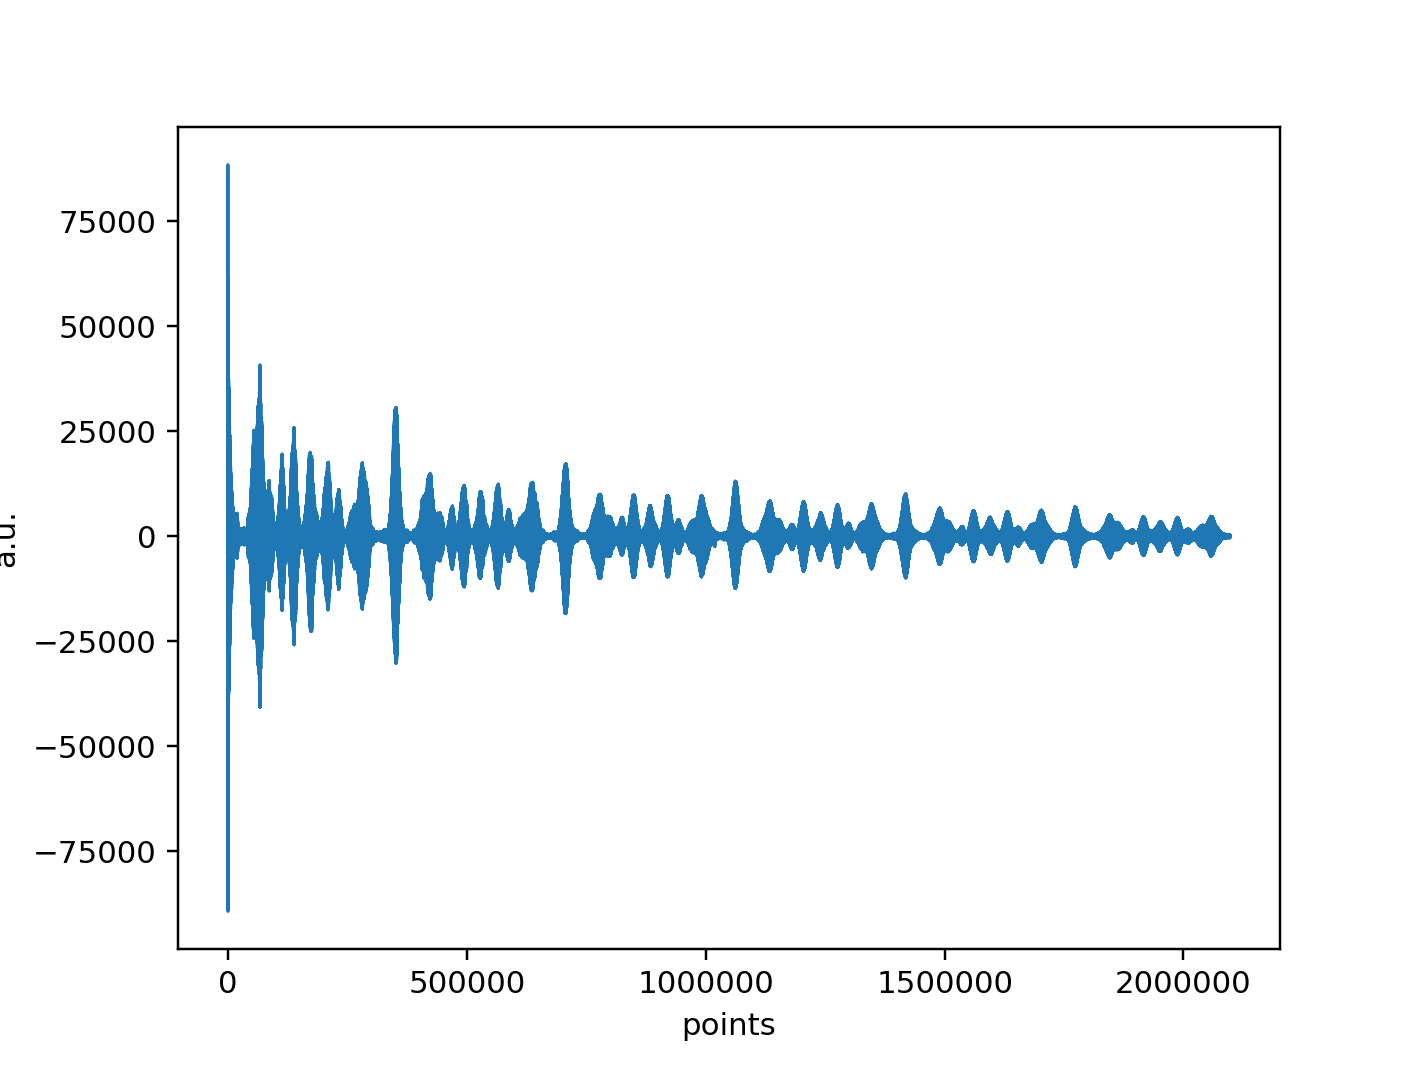

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  2097152 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 984037
data-set is real

In [24]:
d.display()

process it

In [25]:
d.rfft()

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  1048576 complex pairs,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 984037
data-set is complex

<IPython.core.display.Javascript object>


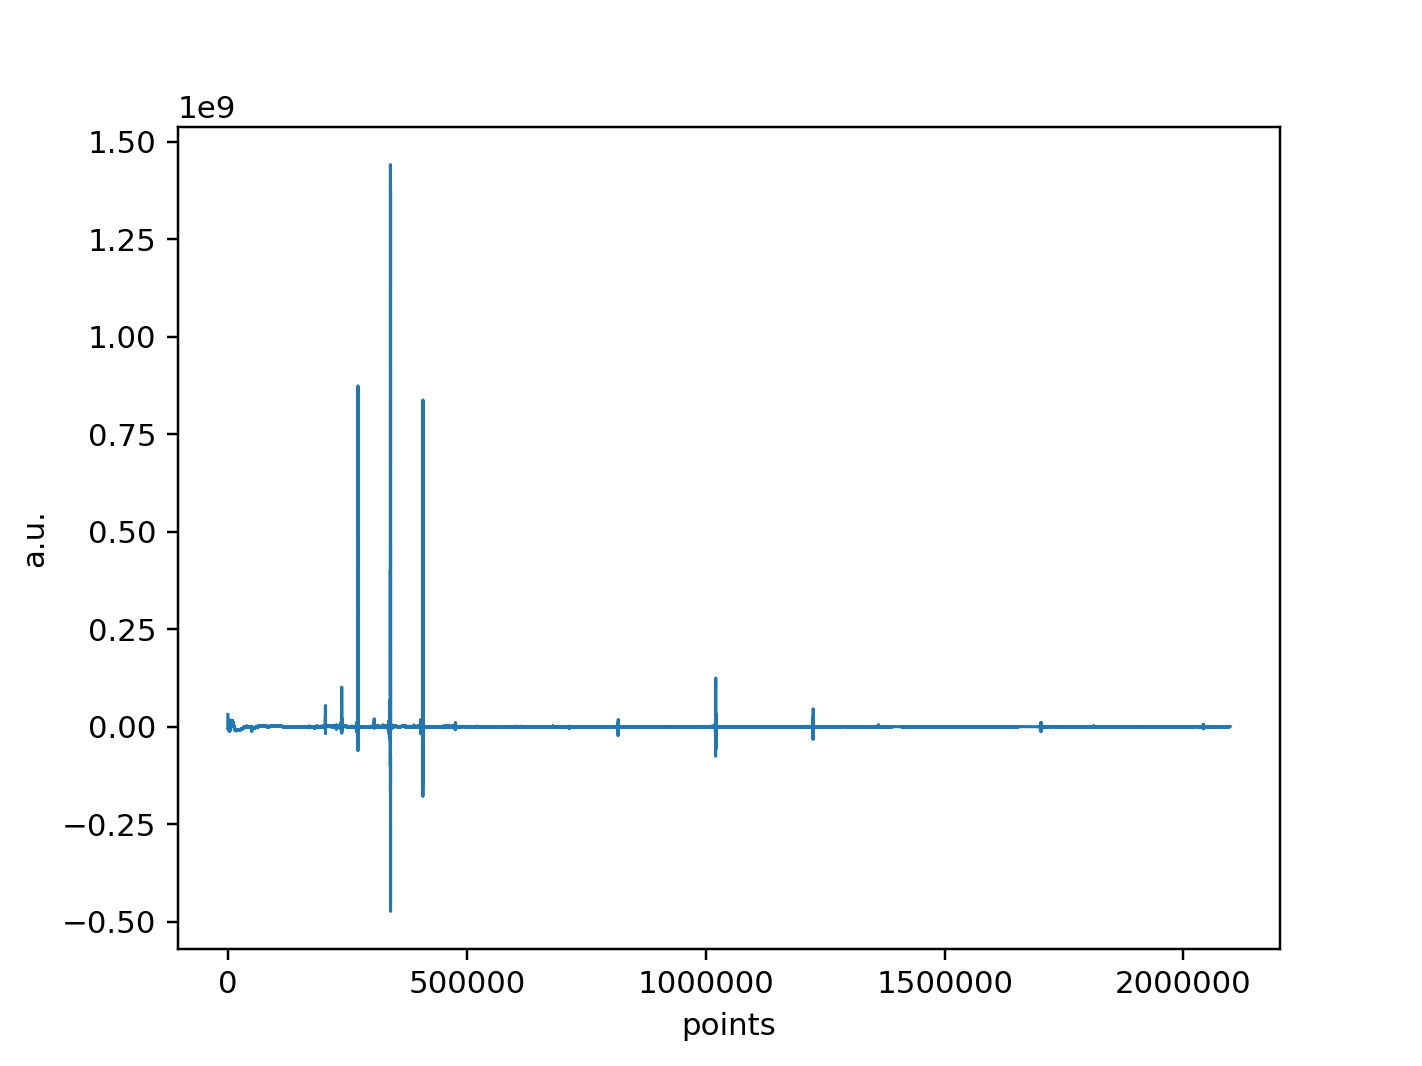

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  1048576 complex pairs,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 984037
data-set is complex

In [26]:
d.display()

every processing command actually modifies the data

In [ ]:
d.modulus()

<IPython.core.display.Javascript object>


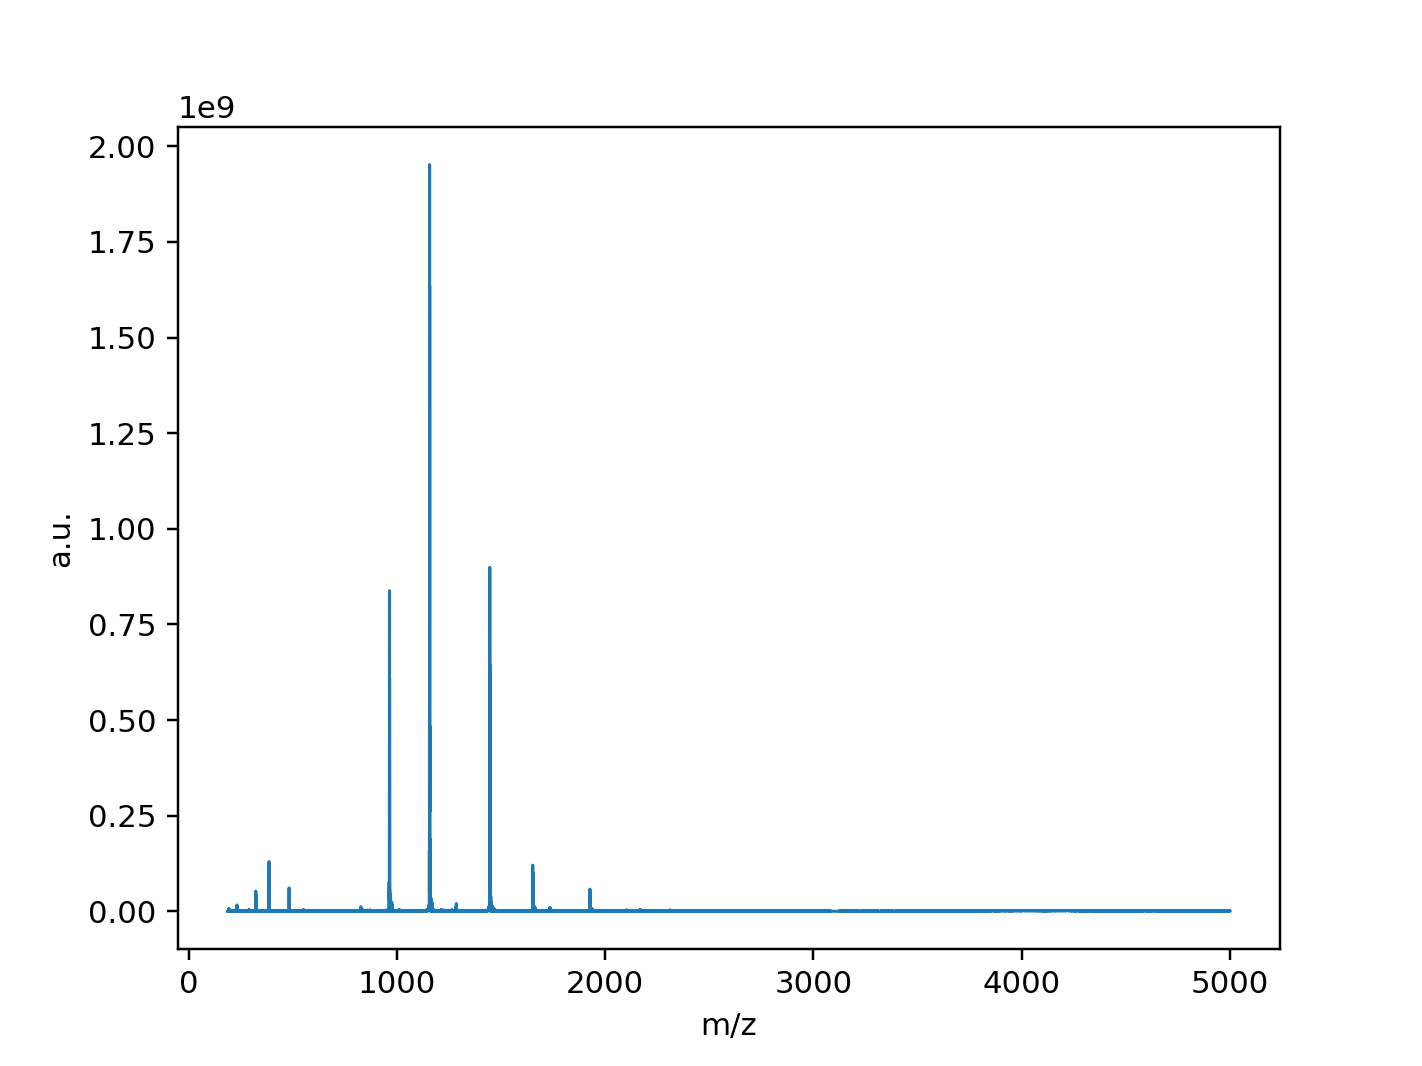

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  1048576 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 492018
data-set is real

In [28]:
d.set_unit('m/z').display()

# chained operations
all actions on `NPKData` can be chained, and all return a  `NPKData`

so you can write:

<IPython.core.display.Javascript object>


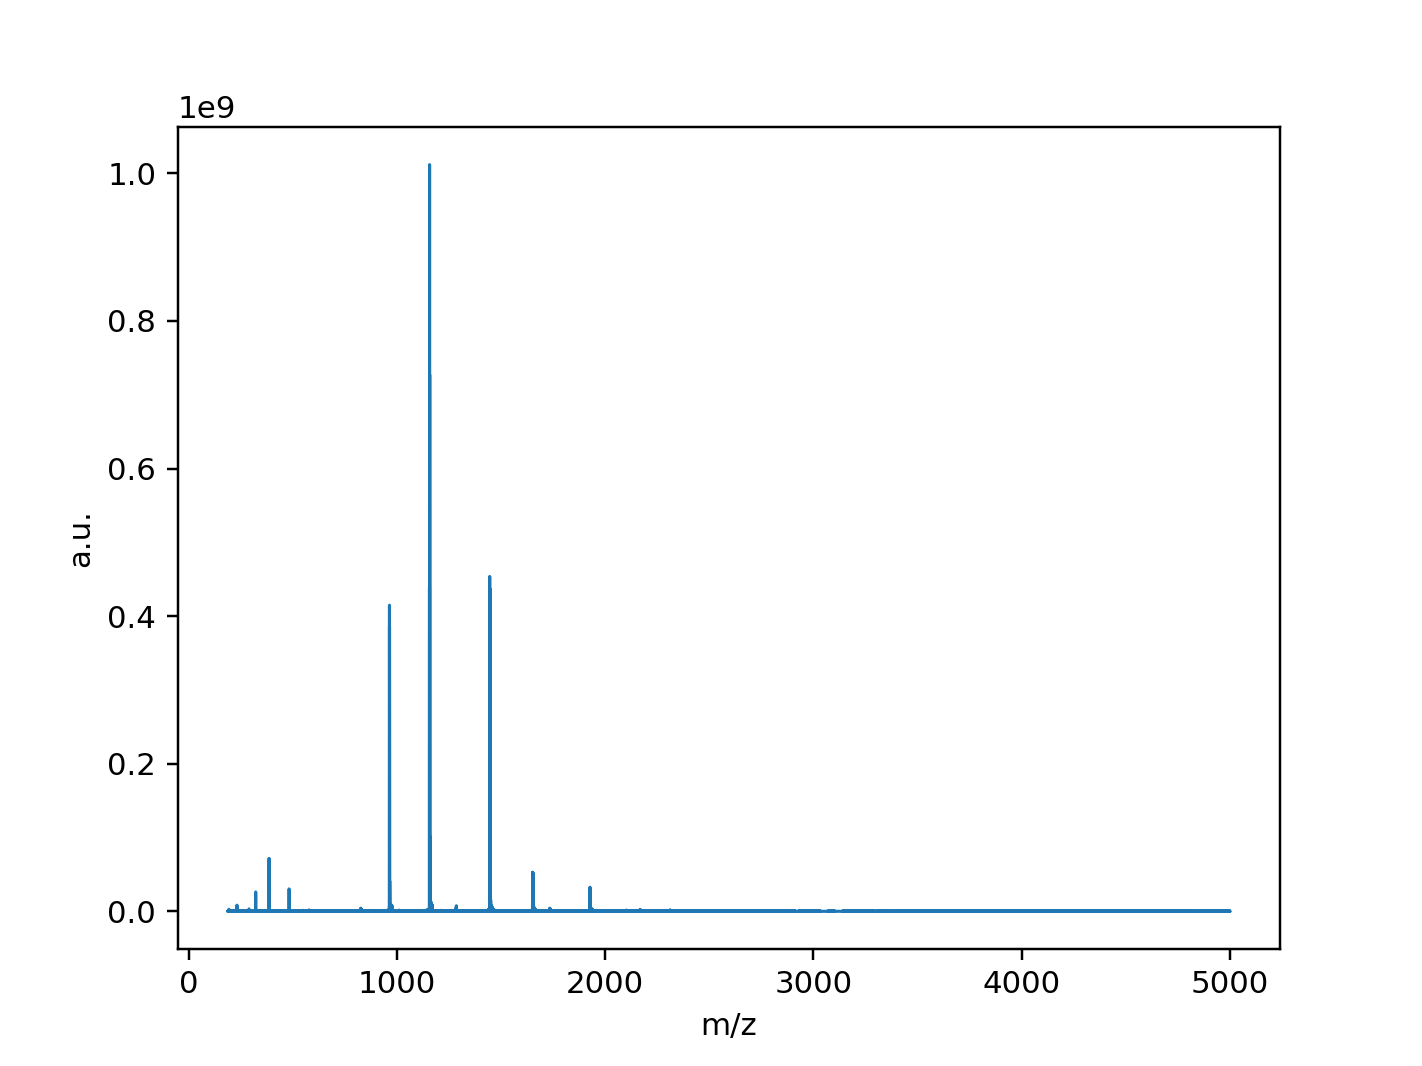

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  4194304 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074
data-set is real

In [33]:
d = BrukerMS.Import_1D(name)  # import and create
d.hamming()   # apodisation
d.zf(4)       #
d.rfft()      # Real Fourier Transform
d.modulus()   # take the modulus
d.set_unit('m/z') # choose unit for display
d.display()   # and display

or equivalently:

<IPython.core.display.Javascript object>


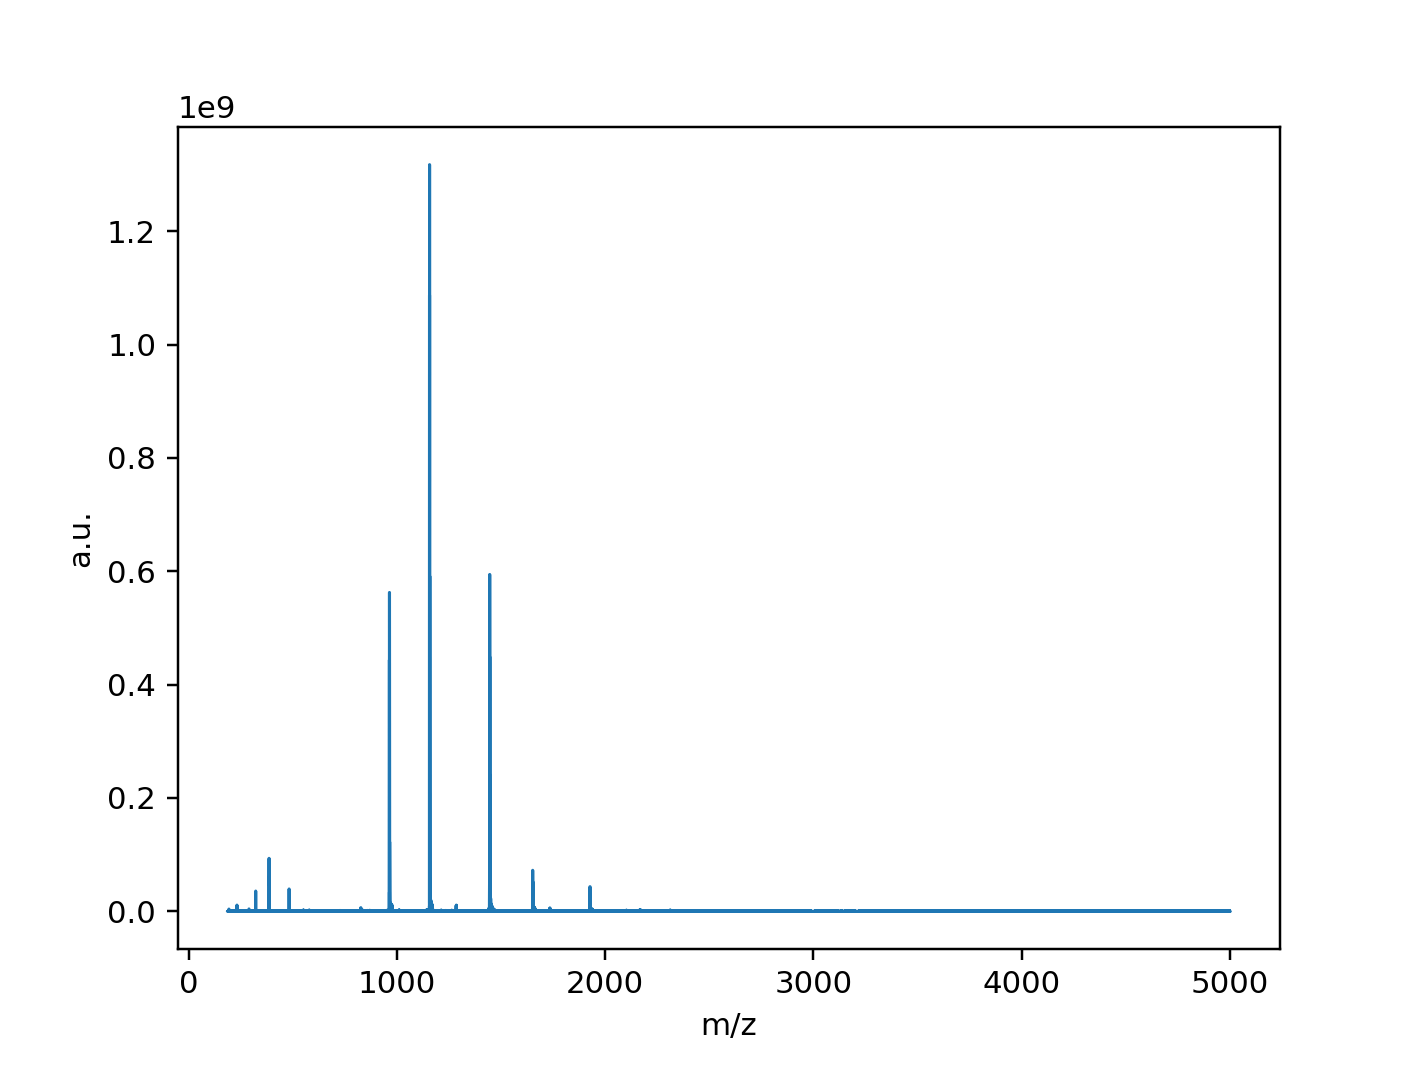

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  4194304 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074
data-set is real

In [35]:
d = Apex.Import_1D(name)
d.kaiser(3).zf(4).rfft().modulus().set_unit('m/z').display()

here above, the data set is created and displayed

# unit
a data-set as a unit which is used for display and selecting zones

<IPython.core.display.Javascript object>


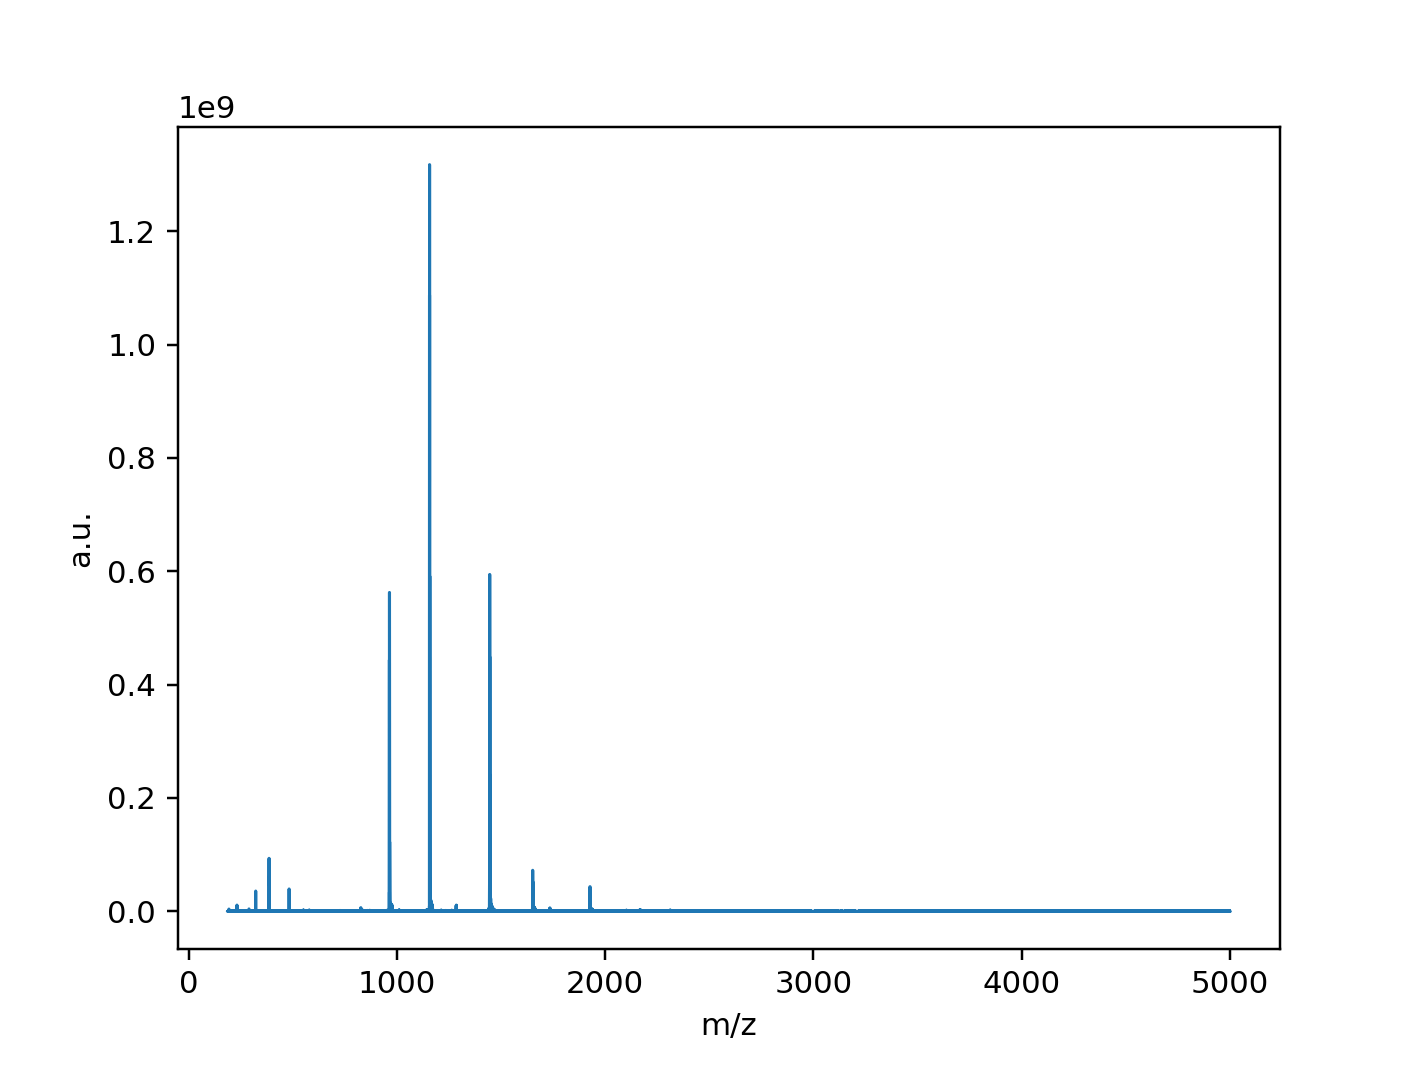

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  4194304 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074
data-set is real

In [36]:
d.set_unit('m/z').display()

<IPython.core.display.Javascript object>


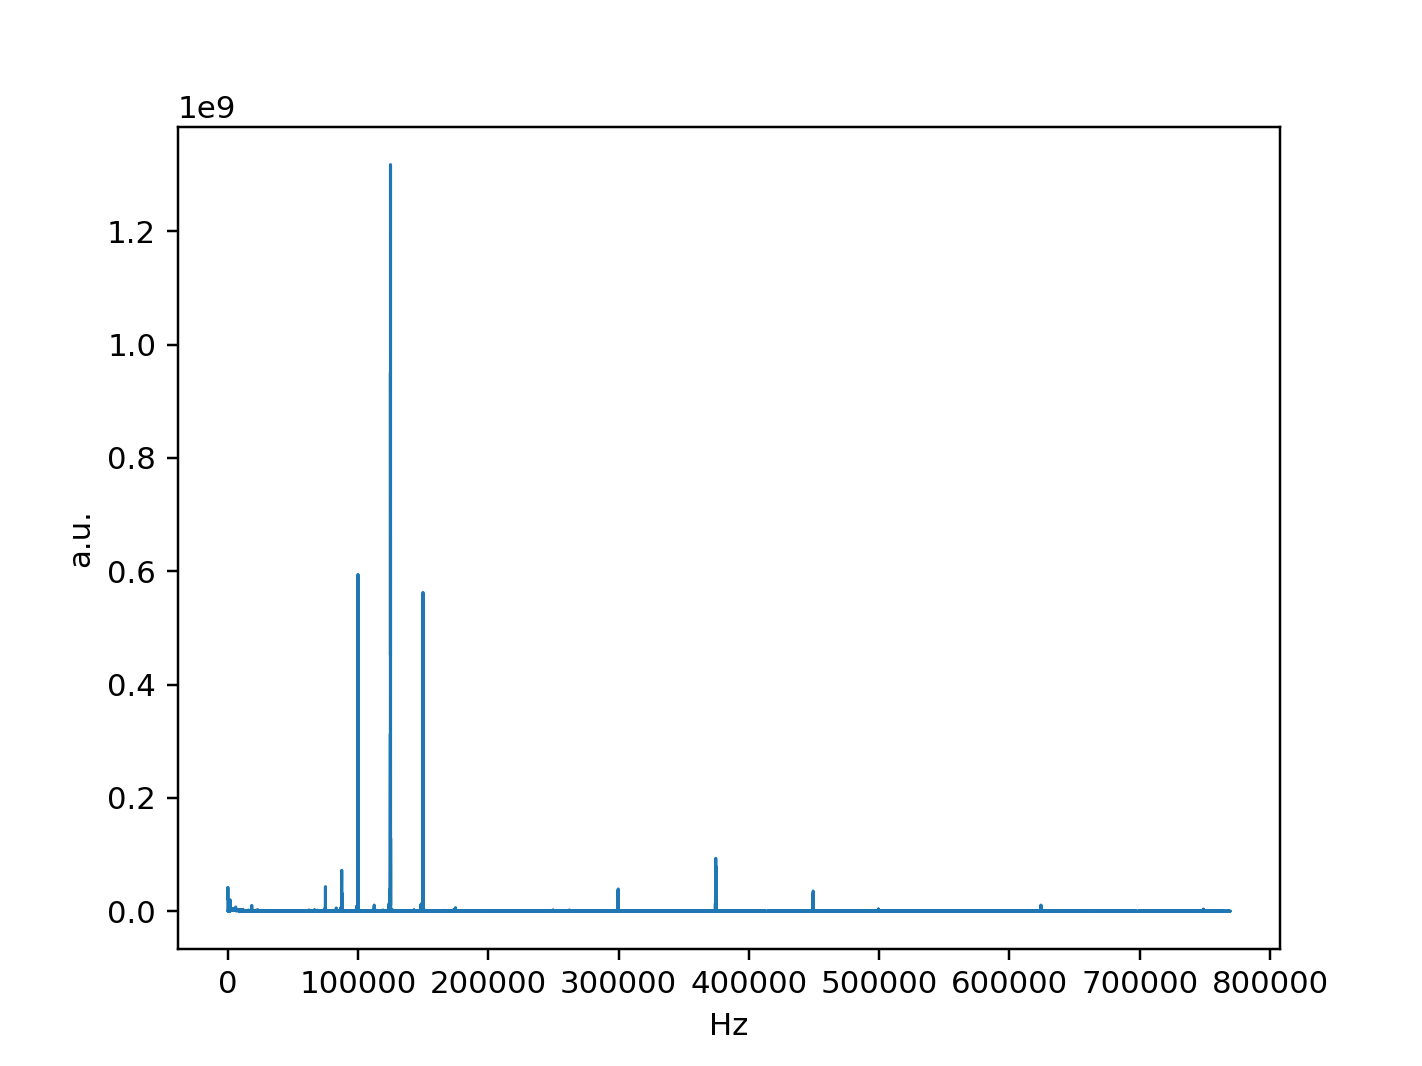

1D data-set
Axis F1 :FT-ICR report axis at 769.230769 kHz,  4194304 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074
data-set is real

In [37]:
d.set_unit('Hz').display()

# objects

Spectral objects are organized around 3 main blocks

- the `buffer` a numpy array that contains the data
- the axis - here `axis1` (`axis1` and `axis2`in 2D) that contains all relevent information on the organisation of the binary data
- the `params`: a dictionay that hold the information gathered on the experiment while importing - depends on the importer

In [38]:
d.buffer

array([22535772.00968312, 42236334.15125355, 34464056.421631  , ...,
          53022.64407905,    84462.39180815,   108607.1194644 ])

In [39]:
d.axis1

In [40]:
d.axis1.report()

'FT-ICR report axis at 769.230769 kHz,  4194304 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074'

In [41]:
d.params

{'AMS_ActiveExclusion': '1',
 'AMS_BasePeak': '0',
 'AMS_ChargeStateTolerance': '0.0',
 'AMS_CollisionalActivationEnabled': '0',
 'AMS_DynamicExclusion': '0',
 'AMS_EXCL_Masses': '&lt;masslistarray&gt;&lt;masslist starttime=&quot;0.0&quot;&gt;&lt;range&gt;&lt;low&gt;0.0&lt;/low&gt;&lt;high&gt;400.0&lt;/high&gt;&lt;/range&gt;&lt;range&gt;&lt;low&gt;1600.0&lt;/low&gt;&lt;high&gt;3000.0&lt;/high&gt;&lt;/range&gt;&lt;/masslist&gt;&lt;/masslistarray&gt;',
 'AMS_EnergyFile': '\t\t1: 0.027   17.044\t\t2: 0.0386  -3.5576\t\t3: 0.0291  -1.0453\t\t4: 0.0291  -1.0453\t\t5: 0.0291  -1.0453\t\t6: 0.0291  -1.0453\t\t',
 'AMS_ExcludeAfter': '1',
 'AMS_FixedCollisionVoltage': '15.0',
 'AMS_FixedCollisionVoltageEnabled': '0',
 'AMS_FractionatedFIA': '0',
 'AMS_FragmentationMode': '0',
 'AMS_INCL_Masses': '&lt;masslistarray&gt;&lt;masslist starttime=&quot;0.0&quot;&gt;&lt;range&gt;&lt;low&gt;200.0&lt;/low&gt;&lt;high&gt;2000.0&lt;/high&gt;&lt;/range&gt;&lt;/masslist&gt;&lt;/masslistarray&gt;',
 'AMS_Iso

In [42]:
d.params['EXC_low']   # note that the content is a string !

'187.6908'

# Conversion
among other things, the axis object knows how to convert units.

For instance a FTICR axis unit can be chosen among `points` `Hz` and `m/z`. The transient knows also `sec`.

there is a set of transformation functions, all called `x_to_y` where `x_` and `_y` are chosen from the possible units

`i h mz s` for points, Hz m/z and sec respectively.

In [43]:
print(d.axis1.itomz(100000))
print(d.axis1.mztoi(1234.5))
print(d.axis1.mztoh(432.1))
print(d.axis1.htoi(123456))

7863.090705499892
637590.4576297792
334113.4799403391
673155.4325184


the *current* unit can be set:

and there are function to convert to and from current unit, using the letter c,
but only `ctoi()` and `itoc()` are defined for the moment

In [44]:
# either
d.set_unit('Hz')  # can be chained
#
d.unit = 'm/z'    # can not be chained
print(d.axis1.itomz(1234567))
print(d.axis1.itoc(1234567))
print(d.axis1.ctoi(2003.2))

637.6105782452341
637.6105782452341
392878.6188472255


## complex vs real
The axis object also knows about the complex/real state of the dataset.

In fact the buffer that contains the binary data is always a real numpy buffer.
A flag called `itype` (for historical reasons) tels whether the data is real (`itype=0`) or complex (`itype=1`), and the program handles every thing accordingly.

so the size of the axis (the number of points along that axis) is either given as the number of values ( `.size`) or as the number of *numbers* (`.cpxsize`) which will be halved in the case of a coplex axis:

In [45]:
print(d.axis1.itype, d.axis1.cpxsize, d.axis1.size)
d.axis1.report()

0 4194304 4194304


'FT-ICR report axis at 769.230769 kHz,  4194304 real points,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074'

In [47]:
d.axis1.itype = 1   # can actually be forced - THIS SHOULD NOT BE DONE IN NORMAL OPERATION -
print(d.axis1.itype, d.axis1.cpxsize, d.axis1.size)
d.axis1.report()

1 2097152 4194304


'FT-ICR report axis at 769.230769 kHz,  2097152 complex pairs,  from physical mz =  187.684   to m/z = 5000.000  R max (M=400) = 1968074'

# Calibration
conversion from points to Hz, and from Hz to m/z requires calibration

from points to Hz is fully determined by the sampling of the axis

from Hz to m/z depends on the calibration constants $A$ $B$ and $C$

with the following law:

$$
Hz = \frac{A}{m/z} - B + \frac{C}{(m/z)^2}
$$

A, B, and C are estimated from the acquisition files at import time.

In [48]:
print(d.axis1.calibA, d.axis1.calibB, d.axis1.calibC)

144382532.0629815 22.145827035073786 -1092421.781298873


an interactive tool is proposed to recalibrate from a set of reference peaks.

# 2D

## Datasets
2D datasets are not so different,

- the buffer is a 2D `numpy` array
- there are 2 axes: `axis1` for the $F1$ (vertical) axis and `axis2` for the $F2$ (horizontal) axis

However, the tools for handling them are quite different

The files are store in a `HDF5` format (a standard format for scientific hierarchical large data-sets), and are called `*.msh5`
These files contains all the data, the definition of the axes, the parameters, etc...
The spectrum are internally compressed (this is not possible for the transient files).

After processing, the spectrum is stored in a multiresolution, hierarchical manner. These files are usually called `*_mr.msh5` with `mr`for multiresolution

## Processing 2D
This is performed with the `processing` program, which is standalone, and steered from a configuration file called `*.mscf` 

It is called by typing:
```
python -m spike.processing configuration.mscf
```

The program is able to use all the core of a multiprocessor machine, and also to be deployed on a cluster running `MPI`


If you load additional files at :

https://pydio.igbmc.fr/pydio/public/b7cc94c3663cc13  
    
you have the `ubiquitine_2D_000002.d` 2D file.

as part of the Tests, tt can be processed with

    python -m spike.Tests -t processing -D actual_address/DATA_test

We'll explore this data-set

In [49]:
cat /Users/mad/NPKV2/DATA_test/test.mscf

# configuration file used for testing

[import]
# __DATA_test__ is a symlink created by the test procedure, pointing to the real dir.
apex = __DATA_test__/ubiquitine_2D_000002.d
format = Apex
F1_specwidth = 500000
F2_specwidth = 500000
highmass = 2500

[processing]
# input file, if not present, will be created from apex above
infile = __DATA_test__/ubiquitine_2D_000002.msh5
# optionnal intermediate file name
# be careful, this one can be larger than both in and out files.
# if interfile absent, the temporary file will created in the designed temp directory and deleted at the end
#interfile = __DATA_test__/ubiquitine_temp.msh5
tempdir = __DATA_test__
# output file
outfile =  __DATA_test__/ubiquitine_2D_000002_mr.msh5

# file can be internally compressed by removing the weakest value lost in the noise
compress_outfile = True
# compress_level is the ratio of noise level that will be discarded, up to 3.0 (3 x sigma) it should be ok.
# the highest compress_level, the better the compression,

## another example for NUS processing

In [50]:
cat  /DATA/FT-ICR/SubP/processing/proc_pg_16_f1.mscf

# configuration file used for testing

[import]
apex = SubP_NUS/220615_2DFT_VD_2k_NUS16_2048_128k_000001.d

F1_specwidth = 1000000
#F2_specwidth = 1000000

format = Solarix

[processing]
# input file, if not present, will be created from apex above
infile = SubP_NUS/220615_2DFT_VD_2k_NUS16_2048_128k_000001.d/NUS16.msh5

# optionnal intermediate file name
# be careful, this one can be larger than both in and out files.
# if interfile absent, the temporary file will created in the standard temp directory and deleted at the end
#interfile = /Echange/NUS/temp.msh5
tempdir = /scratch

# output file
outfile = SubP_NUS/220615_2DFT_VD_2k_NUS16_2048_128k_000001.d/NUS16_f1.msh5
compress_outfile = True
compress_level = 2.0

# if samplingfile is defined, means we have a NUS acquisition
# NUS requires either do_urQRd or do_recital
samplingfile =  SubP_NUS/2_k_list/Sampling_file_ACQ_SIZE_2k_NUS_factor_16.list

#zerofilling = 2 0
sizemultipliers = 32 1
largest_file=400G

# do_F2 : if false, processin

## Displaying 2D
Because of the size of the data-sets, the experiment cannot be simply loaded in memory. 
A special jupyter interactive tool `DisplayFTICR2D.ipynb` is provided to visualize and interact with 2 experiments.

You will find it, among other tools in https://bitbucket.org/delsuc/spike/src